# Milwaukee Bucks Basketball Assesment

**Coach asks whether we should foul?**

I'll be working with the chances.csv data set. The csv includes all chances in the past 3 regular seasons with less than 24 seconds in the game (4th quarter or OT), shot clock is off, and the offensive team is down 3 in order to make a recommendation to the coach on a prescribed course of action. 


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

# Get the Data 
**Read in the chances.csv file and set it to a data frame**

In [3]:
chances = pd.read_csv('chances.csv')

**Check the head of chances.csv**


In [5]:
chances.head()

,gid_nba,game_date,xid_possession,xid_chance,team_nba_off,team_nba_def,period,gameClock_start,gameClock_end,startType,...,shot_fg,shot_fga3,shot_fg3,shot_qSP,shot_m_region,fouls_def,fouls_def_shooting,fta,fta_shooting,team_nba_winner
0,22101142,2022-03-30,d8d49b51-569b-50a1-b94c-4e2b3e322488,7017dee0-2b75-5b2c-9bea-12b889fb1593,HOU,SAC,4,9.40,0.00,SLOB,...,0.0,1.0,0.0,43.654977,Corner,NaN,NaN,NaN,NaN,SAC
1,22100500,2021-12-26,e21fdb4f-0773-5256-8fcc-b6e11a6f1c93,f37908ef-de6b-52ac-b74f-2b4fe032c125,LAC,DEN,4,12.70,0.36,FTLINE,...,0.0,1.0,0.0,17.229163,ATB,NaN,NaN,NaN,NaN,DEN
2,22100268,2021-11-24,5a773801-7051-5b20-b8f2-74d253aa2b7d,9d6411c0-3712-5296-9568-a9a327b47c03,IND,LAL,4,22.64,7.22,FTM,...,1.0,1.0,1.0,34.013932,Corner,NaN,NaN,NaN,NaN,LAL
3,22100968,2022-03-07,e26f1715-ba63-5f85-bdcf-12b0db460468,87395be9-c9bd-5945-b631-960b7dcd82f1,ATL,DET,5,2.16,0.00,FGORB,...,0.0,1.0,0.0,53.275860,ATB,NaN,NaN,NaN,NaN,DET
4,22101014,2022-03-13,9a0c070f-eff6-52b1-bbef-eeccf4b2ad03,04f3b5cb-bb0f-5138-b51e-de84e693c949,BOS,DAL,4,9.00,4.98,SLOB,...,0.0,1.0,0.0,31.667115,ATB,NaN,NaN,NaN,NaN,DAL


**Use info and describe on chances**

In [6]:
chances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gid_nba             405 non-null    int64  
 1   game_date           405 non-null    object 
 2   xid_possession      405 non-null    object 
 3   xid_chance          405 non-null    object 
 4   team_nba_off        405 non-null    object 
 5   team_nba_def        405 non-null    object 
 6   period              405 non-null    int64  
 7   gameClock_start     405 non-null    float64
 8   gameClock_end       405 non-null    float64
 9   startType           405 non-null    object 
 10  outcome             405 non-null    object 
 11  score_margin        405 non-null    int64  
 12  ptsScored_team      405 non-null    int64  
 13  shot_fga            298 non-null    float64
 14  shot_fg             298 non-null    float64
 15  shot_fga3           298 non-null    float64
 16  shot_fg3

In [7]:
chances.describe()

,gid_nba,period,gameClock_start,gameClock_end,score_margin,ptsScored_team,shot_fga,shot_fg,shot_fga3,shot_fg3,shot_qSP,fouls_def,fouls_def_shooting,fta,fta_shooting
count,4.050000e+02,405.000000,405.000000,405.000000,405.0,405.000000,298.000000,298.000000,298.000000,298.000000,283.000000,73.000000,73.000000,61.000000,61.000000
mean,2.210873e+07,4.162963,10.952247,5.708049,-3.0,0.740741,0.949664,0.255034,0.775168,0.157718,42.409505,1.013699,0.260274,2.131148,0.721311
std,8.060659e+04,0.389352,5.944630,4.979655,0.0,1.145134,0.219004,0.436613,0.418174,0.365090,16.521347,0.117041,0.441821,0.531520,1.170913
min,2.200002e+07,4.000000,0.440000,0.000000,-3.0,0.000000,0.000000,0.000000,0.000000,0.000000,11.172912,1.000000,0.000000,1.000000,0.000000
25%,2.200089e+07,4.000000,6.500000,1.360000,-3.0,0.000000,1.000000,0.000000,1.000000,0.000000,31.497252,1.000000,0.000000,2.000000,0.000000
50%,2.210086e+07,4.000000,10.100000,4.680000,-3.0,0.000000,1.000000,0.000000,1.000000,0.000000,39.334954,1.000000,0.000000,2.000000,0.000000
75%,2.220042e+07,4.000000,15.600000,8.900000,-3.0,2.000000,1.000000,1.000000,1.000000,0.000000,48.659252,1.000000,1.000000,2.000000,1.000000
max,2.220122e+07,6.000000,23.960000,19.780000,-3.0,4.000000,1.000000,1.000000,1.000000,1.000000,99.900000,2.000000,1.000000,4.000000,3.000000


# Exploratory Analysis 

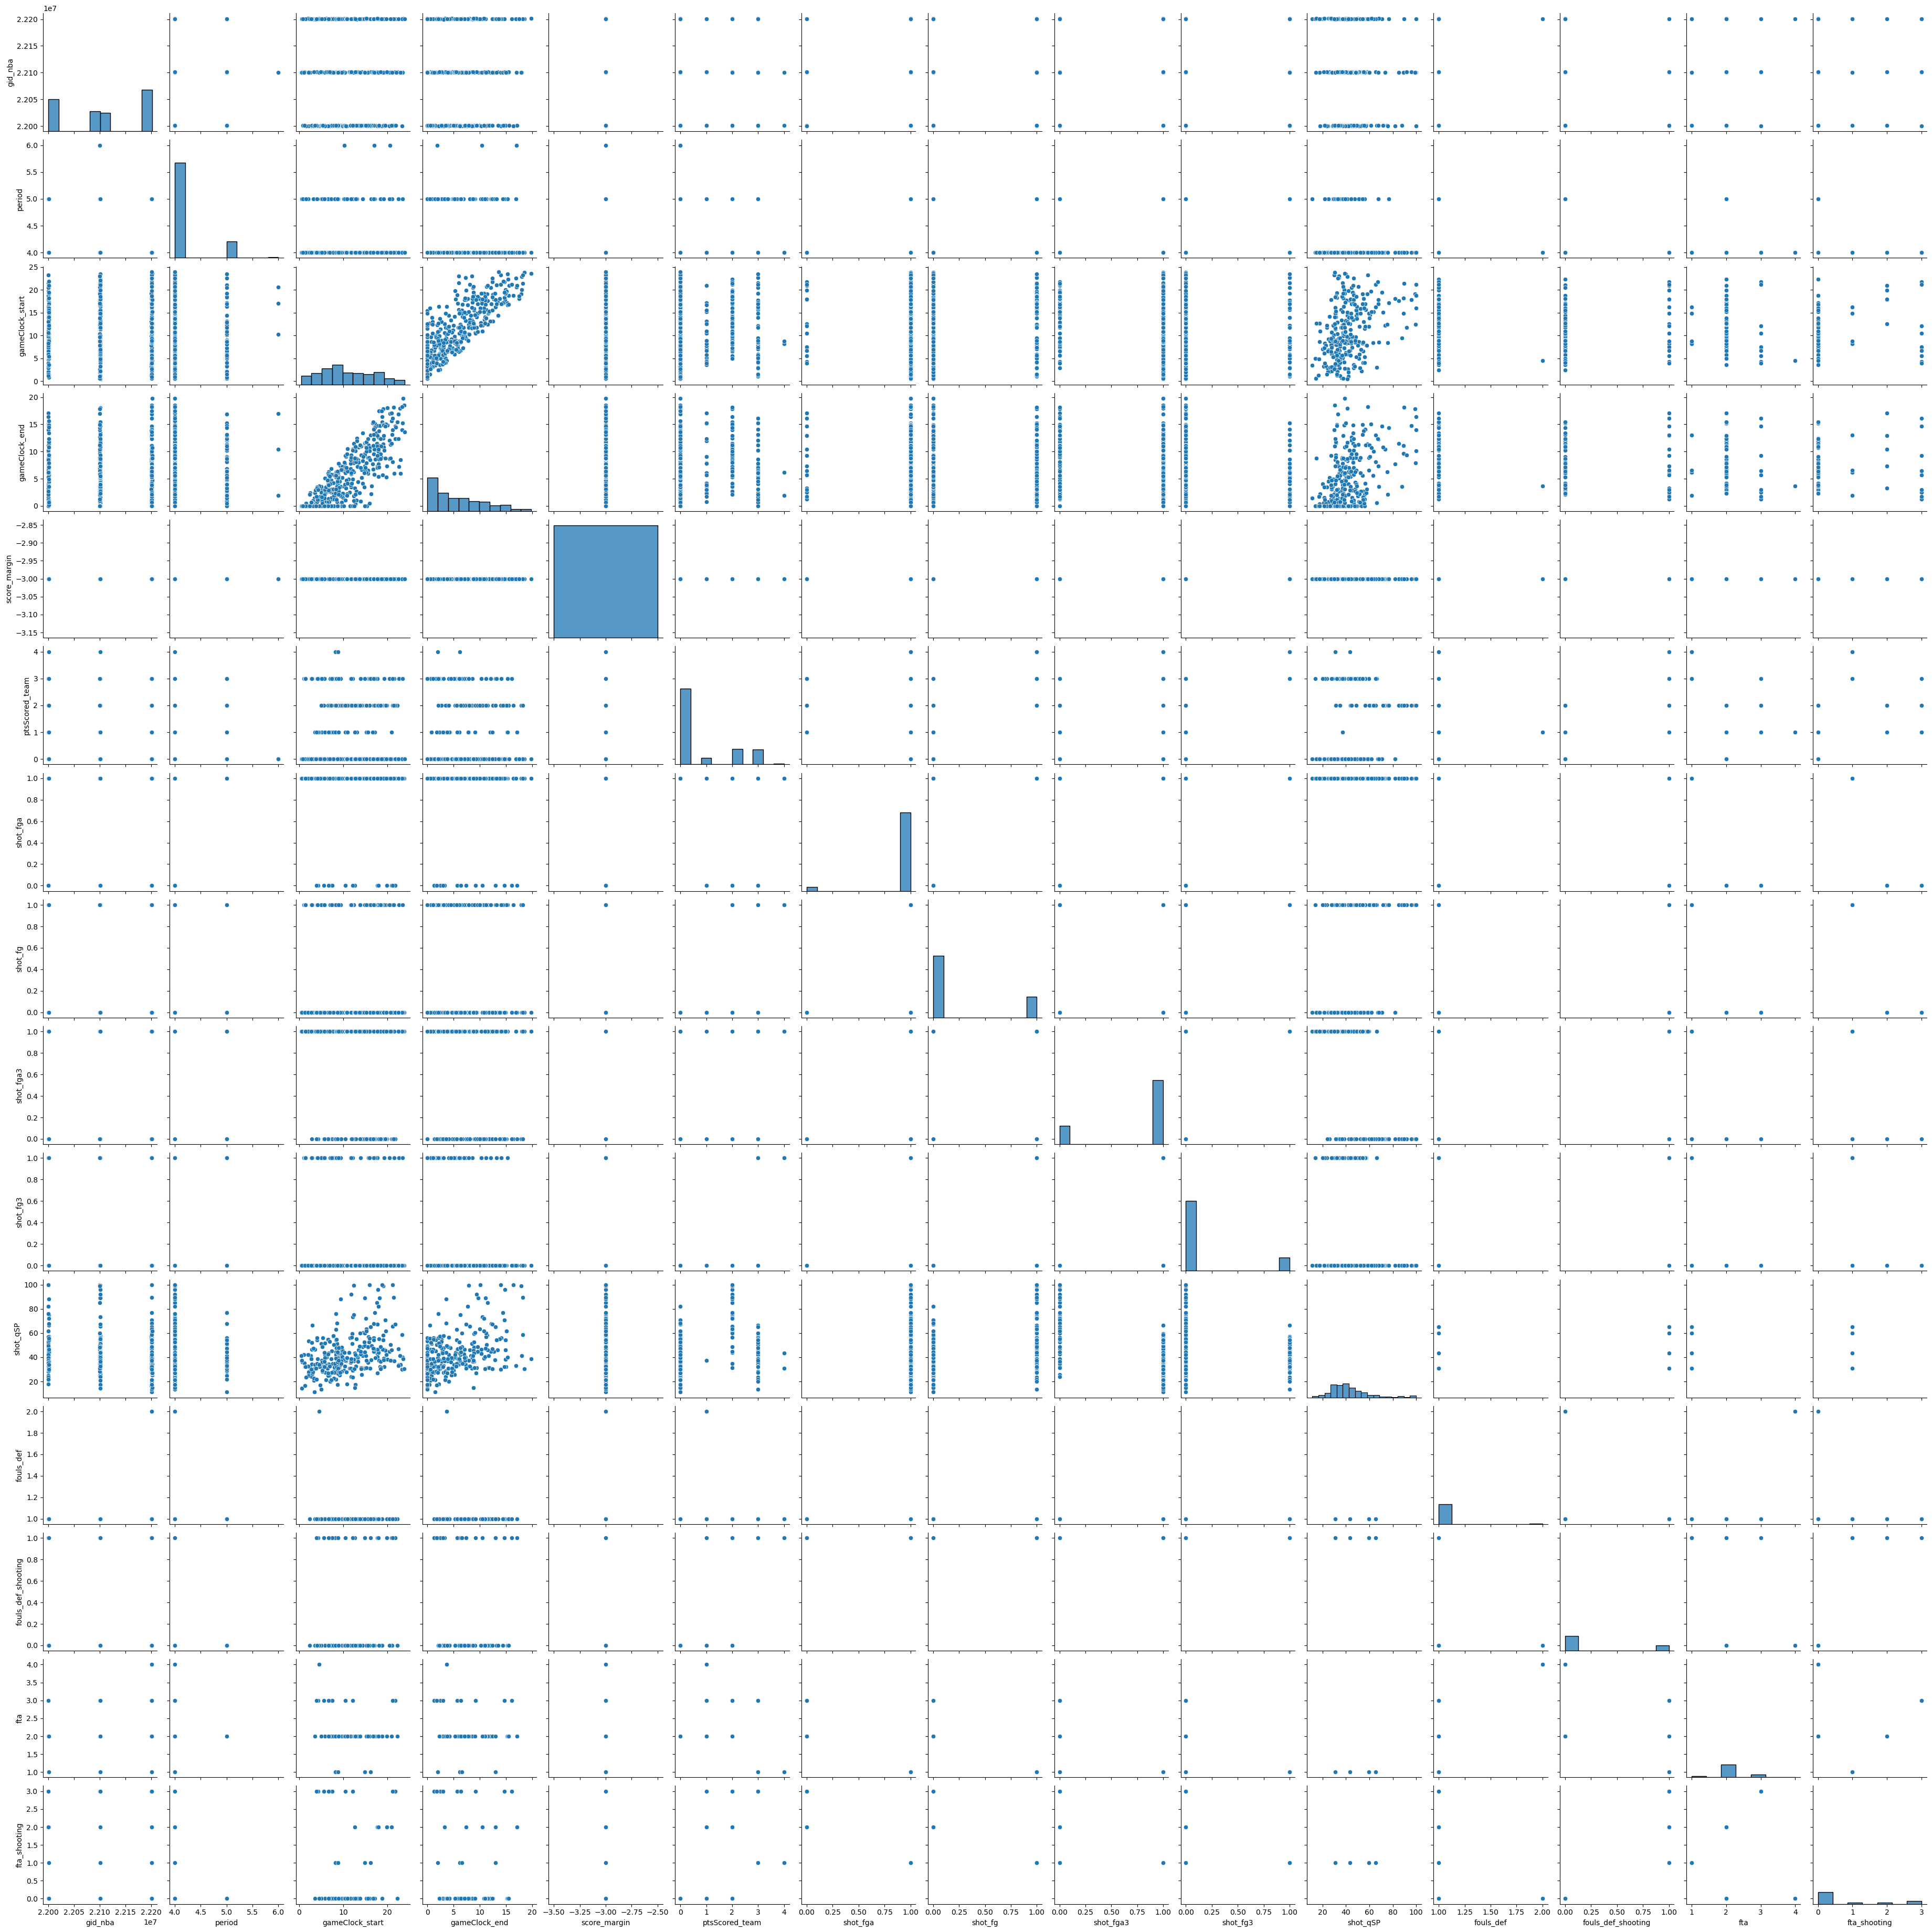

In [8]:
sns.pairplot(chances)

In [21]:
real_chances = chances[["gameClock_start", "gameClock_end", "shot_qSP", "shot_fg3",
                        "ptsScored_team", "shot_fga3", "fta", "fta_shooting"]]

In [22]:
real_chances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gameClock_start  405 non-null    float64
 1   gameClock_end    405 non-null    float64
 2   shot_qSP         283 non-null    float64
 3   shot_fg3         298 non-null    float64
 4   ptsScored_team   405 non-null    int64  
 5   shot_fga3        298 non-null    float64
 6   fta              61 non-null     float64
 7   fta_shooting     61 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 25.4 KB


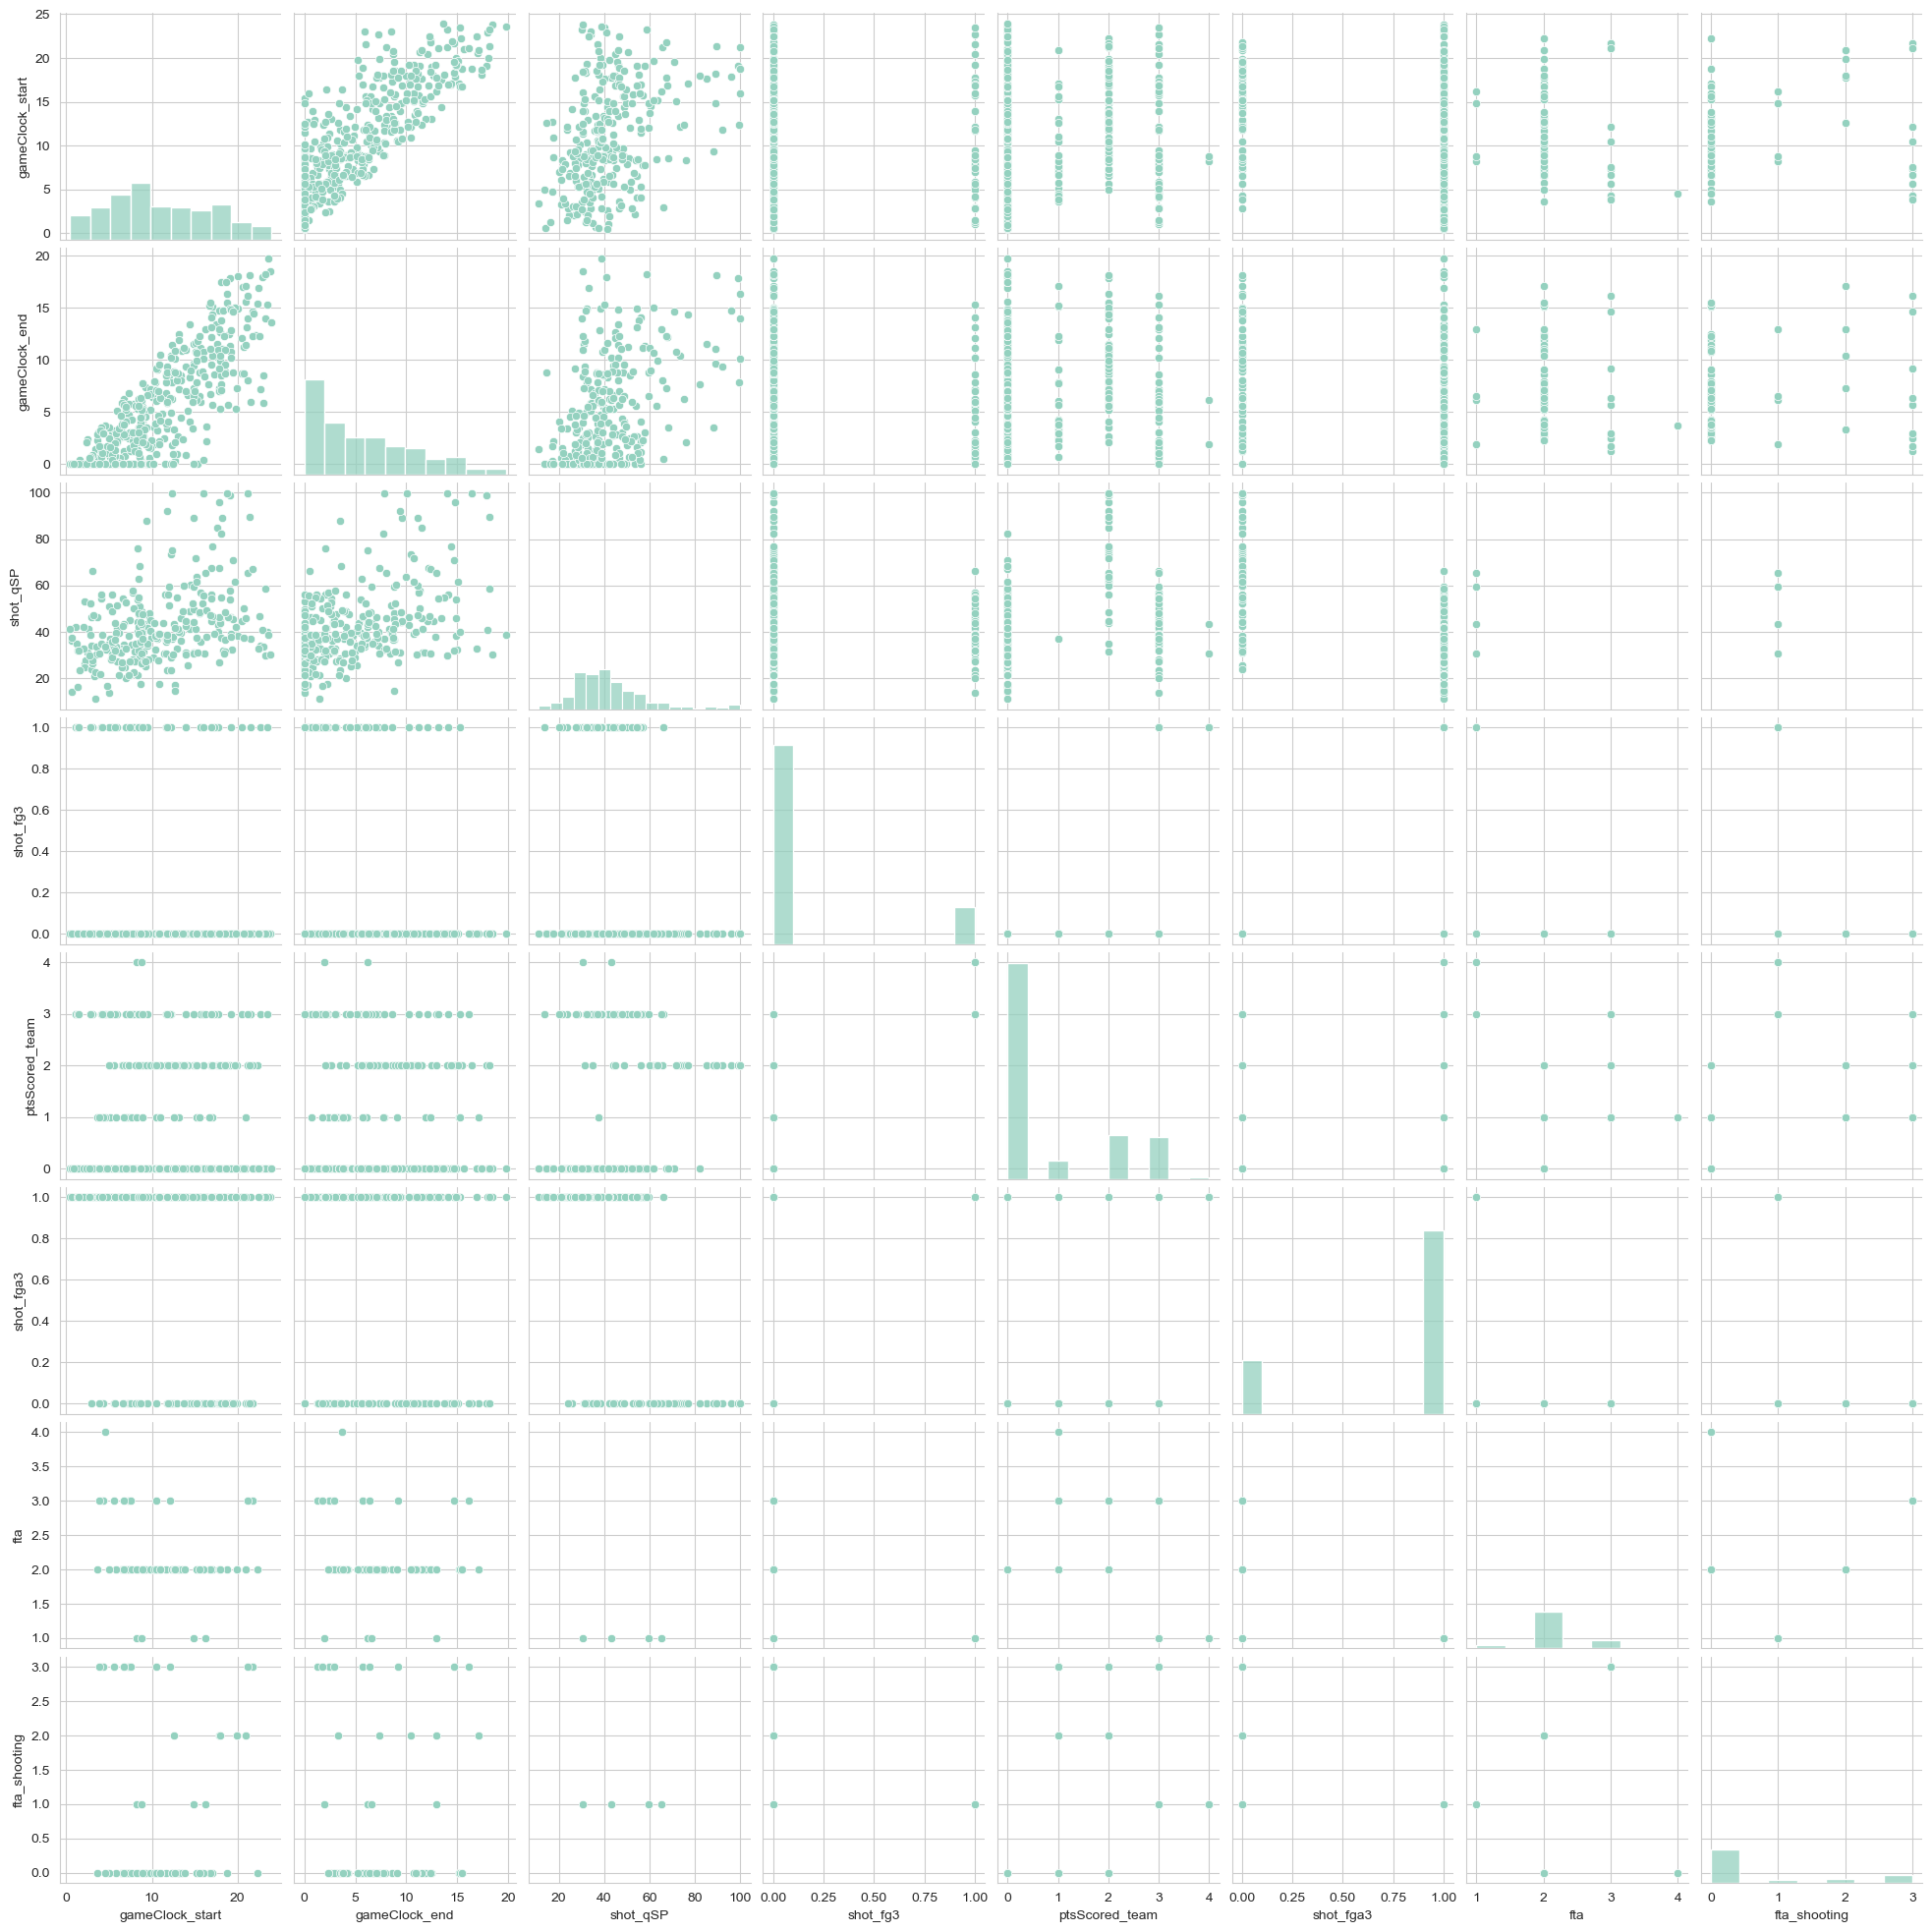

In [23]:
sns.pairplot(real_chances)

In [18]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

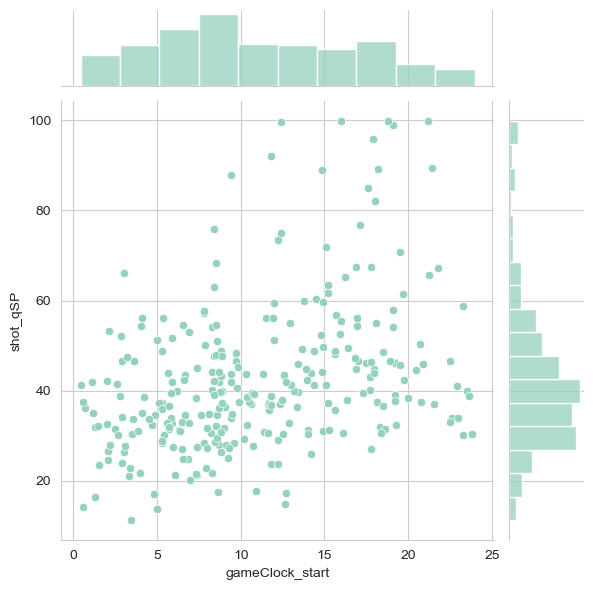

In [19]:
sns.jointplot(x="gameClock_start", y= "shot_qSP", data = real_chances)

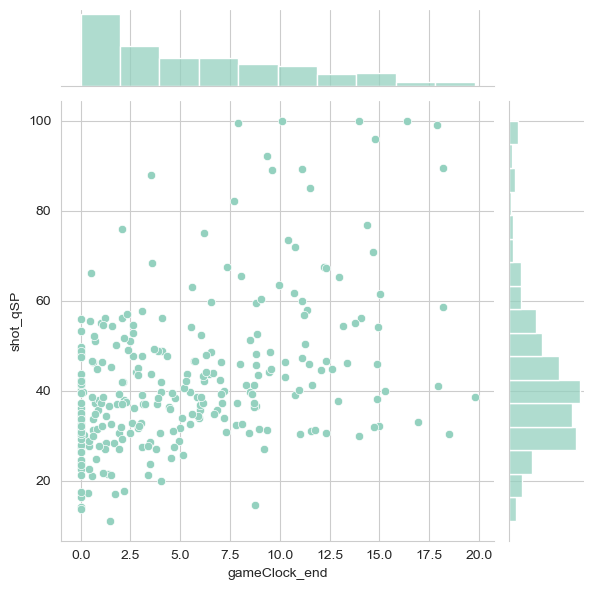

In [15]:
sns.jointplot(x="gameClock_end", y= "shot_qSP", data = real_chances)